In [109]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

In [2]:
# Ignore futurewarnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the Data we Web-Scraped
TDF_GC = pd.read_csv('DATA/TDF_GC.csv')

In [4]:
# Quick glance at our data
TDF_GC.head()

,Rank,Prev_rank,Rider_name,Team_name,UCI_points,Points,Time,Year
0,1,1,POGAČAR Tadej,UAE-Team Emirates,1000.0,500.0,82:56:36,2021
1,2,2,VINGEGAARD Jonas,Team Jumbo-Visma,800.0,380.0,5:205:20,2021
2,3,3,CARAPAZ Richard,INEOS Grenadiers,675.0,340.0,7:037:03,2021
3,4,4,O'CONNOR Ben,AG2R Citroën Team,575.0,300.0,10:0210:02,2021
4,5,5,KELDERMAN Wilco,BORA - hansgrohe,475.0,280.0,10:1310:13,2021


In [5]:
# Checking data types
TDF_GC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741 entries, 0 to 1740
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1741 non-null   object 
 1   Prev_rank   1741 non-null   int64  
 2   Rider_name  1741 non-null   object 
 3   Team_name   1741 non-null   object 
 4   UCI_points  439 non-null    float64
 5   Points      1736 non-null   float64
 6   Time        1741 non-null   object 
 7   Year        1741 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 108.9+ KB


In [6]:
# Checking the number of null values in each column
TDF_GC.isna().sum()

Rank             0
Prev_rank        0
Rider_name       0
Team_name        0
UCI_points    1302
Points           5
Time             0
Year             0
dtype: int64

### Changing Rank data type from object to int (numeric)

In [7]:
# Changing Rank data type from object to int (numeric)
TDF_GC.Rank = TDF_GC.Rank.astype('int16')

### Filling NaN values in the Points column

In [8]:
# Pulling out the data will Null values in the Points column
TDF_GC[TDF_GC.Points.isna() == True]

,Rank,Prev_rank,Rider_name,Team_name,UCI_points,Points,Time,Year
1435,15,15,MENCHOV Denis,Team Katusha,NaN,NaN,27:2227:22,2012
1457,37,37,CARUSO Giampaolo,Team Katusha,NaN,NaN,1:28:321:28:32,2012
1578,5,5,CONTADOR Alberto,Saxo Bank - Sungard,NaN,NaN,3:573:57,2011
1608,35,35,BARREDO Carlos,Rabobank Cycling Team,NaN,NaN,1:12:581:12:58,2011
1660,87,87,KOREN Kristijan,Liquigas - Cannondale,NaN,NaN,2:29:242:29:24,2011


Points are associated with rank. If we look at other riders with similar rank, we can impute what the missing Point value should be.

In [9]:
# Points for Rank greater than or equal to 35
TDF_GC.Points[TDF_GC.Rank >= 35]

34      25.0
35      25.0
36      25.0
37      25.0
38      25.0
        ... 
1736    25.0
1737    25.0
1738    25.0
1739    25.0
1740    25.0
Name: Points, Length: 1367, dtype: float64

All point values are 25.

In [10]:
# Fill the missing Points value with 25 where Rank is greater than or equal to 35
TDF_GC.Points[(TDF_GC.Points.isna() == True) & (TDF_GC.Rank >= 35)] = 25

In [11]:
# Points for Rank equal to 15
TDF_GC.Points[TDF_GC.Rank == 15]

14      150.0
155     150.0
301     150.0
456     150.0
601     150.0
768     150.0
942     150.0
1102    150.0
1266    150.0
1435      NaN
1589    150.0
Name: Points, dtype: float64

In [12]:
# Fill the missing Points value with 150 where Rank is equal to 15
TDF_GC.Points[(TDF_GC.Points.isna() == True) & (TDF_GC.Rank == 15)] = 150

In [13]:
# Points for Rank equal to 5
TDF_GC.Points[TDF_GC.Rank == 5]

4       280.0
145     280.0
291     280.0
446     280.0
591     280.0
758     280.0
932     280.0
1092    280.0
1256    280.0
1425    280.0
1578      NaN
1579    280.0
Name: Points, dtype: float64

In [14]:
# Fill the missing Points value with 280 where Rank is equal to 5
TDF_GC.Points[(TDF_GC.Points.isna() == True) & (TDF_GC.Rank == 5)] = 280

In [15]:
# Checking for missing/Null values
TDF_GC.isna().sum()

Rank             0
Prev_rank        0
Rider_name       0
Team_name        0
UCI_points    1302
Points           0
Time             0
Year             0
dtype: int64

`UCY_points` is missing far too many values. Best action is to eliminate this column (the information is also present in the form of **Points, Rank** and **Time**)

In [16]:
# Dropping the UCI_points column
TDF_GC = TDF_GC.drop(['UCI_points'],axis=1)

In [17]:
# Checking for missing/Null values
TDF_GC.isna().sum()

Rank          0
Prev_rank     0
Rider_name    0
Team_name     0
Points        0
Time          0
Year          0
dtype: int64

In [18]:
# Checking if all data types appropriate
TDF_GC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741 entries, 0 to 1740
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1741 non-null   int16  
 1   Prev_rank   1741 non-null   int64  
 2   Rider_name  1741 non-null   object 
 3   Team_name   1741 non-null   object 
 4   Points      1741 non-null   float64
 5   Time        1741 non-null   object 
 6   Year        1741 non-null   int64  
dtypes: float64(1), int16(1), int64(2), object(3)
memory usage: 85.1+ KB


# Importing Rider metrics

In [19]:
# Importing the file with rider's stats and looking at the data
rider_metrics = pd.read_csv('DATA/Unique_names.csv')
rider_metrics.head()

,Name,URL,Weight(kg),Height(m),YOB
0,POGAČAR Tadej,https://www.procyclingstats.com/rider/Tadej-PO...,66.0,1.76,1998
1,VINGEGAARD Jonas,https://www.procyclingstats.com/rider/Jonas-VI...,60.0,1.75,1996
2,CARAPAZ Richard,https://www.procyclingstats.com/rider/Richard-...,62.0,1.70,1993
3,O'CONNOR Ben,https://www.procyclingstats.com/rider/Ben-O'CO...,67.0,1.88,1995
4,KELDERMAN Wilco,https://www.procyclingstats.com/rider/Wilco-KE...,65.0,1.85,1991


In [20]:
# Checking data type
rider_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        648 non-null    object 
 1   URL         648 non-null    object 
 2   Weight(kg)  647 non-null    float64
 3   Height(m)   648 non-null    float64
 4   YOB         648 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 25.4+ KB


URL is unecessary for the EDA, let's drop it

In [22]:
rider_metrics = rider_metrics.drop(['URL'],axis=1)

In [23]:
# Checking for null values
rider_metrics.isna().sum()

Name          0
Weight(kg)    1
Height(m)     0
YOB           0
dtype: int64

In [24]:
# Looking at the row with missing Weight value
rider_metrics[rider_metrics['Weight(kg)'].isna()==True]

,Name,Weight(kg),Height(m),YOB
44,DONOVAN Mark,NaN,1.86,1999


Lets impute this missing weight. Find the median weight of rider with height of 1.86m and fill it in our missing row.

In [25]:
# Median weight of a rider with height of 1.86m
rider_metrics['Weight(kg)'][rider_metrics['Height(m)'] == 1.86].median()

74.0

In [26]:
# Inserting the median to the missing data point
rider_metrics['Weight(kg)'][rider_metrics['Weight(kg)'].isna()==True] = 74

In [27]:
# Checking for null values
rider_metrics.isna().sum()

Name          0
Weight(kg)    0
Height(m)     0
YOB           0
dtype: int64

# Left join Rider metrics onto our main DataFrame

In [28]:
# Merging the two data frames together
TDF_GC = pd.merge(TDF_GC,rider_metrics, left_on = 'Rider_name', right_on = 'Name')

In [30]:
# Quick glance at the data
TDF_GC.head()

,Rank,Prev_rank,Rider_name,Team_name,Points,Time,Year,Name,Weight(kg),Height(m),YOB
0,1,1,POGAČAR Tadej,UAE-Team Emirates,500.0,82:56:36,2021,POGAČAR Tadej,66.0,1.76,1998
1,1,1,POGAČAR Tadej,UAE-Team Emirates,500.0,87:20:05,2020,POGAČAR Tadej,66.0,1.76,1998
2,2,2,VINGEGAARD Jonas,Team Jumbo-Visma,380.0,5:205:20,2021,VINGEGAARD Jonas,60.0,1.75,1996
3,3,3,CARAPAZ Richard,INEOS Grenadiers,340.0,7:037:03,2021,CARAPAZ Richard,62.0,1.70,1993
4,13,13,CARAPAZ Richard,INEOS Grenadiers,170.0,25:5325:53,2020,CARAPAZ Richard,62.0,1.70,1993


We can get rid of the second `Name` column.

In [33]:
# Dropping the Name column
TDF_GC = TDF_GC.drop(['Name'],axis=1)

The column `YOB` (Year of Birth) is not as relevant as age of rider during the race. Let's compute rider's age the year they participated.

In [36]:
TDF_GC['Age'] = TDF_GC.Year - TDF_GC.YOB

We can now get rid of Year of Birth `YOB` as we keep that information in their `Age`

In [37]:
TDF_GC = TDF_GC.drop(['YOB'],axis=1)

In [38]:
# Checking the data types are appropriate
TDF_GC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1741 entries, 0 to 1740
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1741 non-null   int16  
 1   Prev_rank   1741 non-null   int64  
 2   Rider_name  1741 non-null   object 
 3   Team_name   1741 non-null   object 
 4   Points      1741 non-null   float64
 5   Time        1741 non-null   object 
 6   Year        1741 non-null   int64  
 7   Weight(kg)  1741 non-null   float64
 8   Height(m)   1741 non-null   float64
 9   Age         1741 non-null   int64  
dtypes: float64(3), int16(1), int64(3), object(3)
memory usage: 139.4+ KB


In [39]:
# Checking for null values
TDF_GC.isna().sum()

Rank          0
Prev_rank     0
Rider_name    0
Team_name     0
Points        0
Time          0
Year          0
Weight(kg)    0
Height(m)     0
Age           0
dtype: int64

In [107]:
TDF_GC.head()

,Rank,Prev_rank,Rider_name,Team_name,Points,Time,Year,Weight(kg),Height(m),Age
0,1,1,POGAČAR Tadej,UAE-Team Emirates,500.0,82:56:36,2021,66.0,1.76,23
1,1,1,POGAČAR Tadej,UAE-Team Emirates,500.0,87:20:05,2020,66.0,1.76,22
2,2,2,VINGEGAARD Jonas,Team Jumbo-Visma,380.0,5:205:20,2021,60.0,1.75,25
3,3,3,CARAPAZ Richard,INEOS Grenadiers,340.0,7:037:03,2021,62.0,1.70,28
4,13,13,CARAPAZ Richard,INEOS Grenadiers,170.0,25:5325:53,2020,62.0,1.70,27


Keen eyed would observe that the time column is an object and not numeric. Its a tricky column as only the absolute time of the winner is given, and the remaining times are relative. Careful Feature Engineering is required for its conversion to numeric data type.

### Let's save the DataFrame into a CSV file to used for modeling.

In [108]:
TDF_GC.to_csv('DATA/TDF_GC_with_rider_metrics.csv',index = False)

# Graphing Data to observe trends

### Weight in Kilograms

In [100]:
print('Lightest Rider:', min(TDF_GC['Weight(kg)']))
print('Heaviest Rider:', max(TDF_GC['Weight(kg)']))

Lightest Rider: 52.0
Heaviest Rider: 90.0


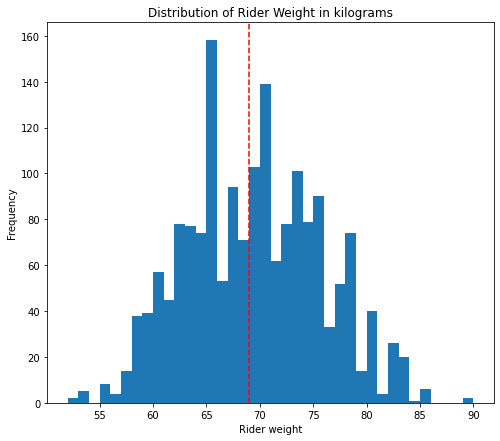

In [101]:
# Dsitribution of rider weight
plt.figure(figsize=(8,7))
plt.hist(TDF_GC['Weight(kg)'],bins=38)
plt.title('Distribution of Rider Weight in kilograms')
plt.xlabel('Rider weight')
plt.ylabel('Frequency')
plt.axvline(TDF_GC['Weight(kg)'].mean(), linestyle = '--',c='r')
plt.show()

### Weight of the TDF winners

In [88]:
TDF_GC[TDF_GC.Rank==1]['Weight(kg)']

0       66.0
1       66.0
155     71.0
465     66.0
466     66.0
467     66.0
468     66.0
775     60.0
806     65.0
1570    64.0
1636    76.0
Name: Weight(kg), dtype: float64

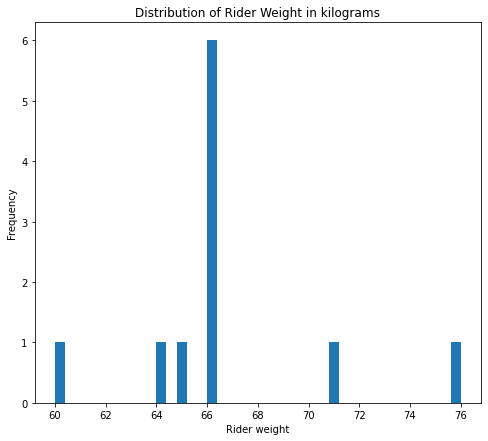

In [110]:
# Distribution of rider weight for winner
plt.figure(figsize=(8,7))
plt.hist(TDF_GC['Weight(kg)'][TDF_GC['Rank'] == 1],bins=40)
plt.title('Distribution of Rider Weight in kilograms')
plt.xlabel('Rider weight')
plt.ylabel('Frequency')
# plt.axvline(TDF_GC['Weight(kg)'].mean(), linestyle = '--',c='r')
plt.show()

In [89]:
print('Mean Weight of a TDF winner: ',TDF_GC[TDF_GC.Rank==1]['Weight(kg)'].mean())
print('Median Weight of a TDF winner: ',TDF_GC[TDF_GC.Rank==1]['Weight(kg)'].median())
print('Most common Weight of a TDF winner: ',TDF_GC[TDF_GC.Rank==1]['Weight(kg)'].mode())

Mean Weight of a TDF winner:  66.54545454545455
Median Weight of a TDF winner:  66.0
Most common Weight of a TDF winner:  0    66.0
dtype: float64


Seems like a TDF winner weighs around 66 kg.

### Height in meters

In [102]:
print('Shortest Rider:', min(TDF_GC['Height(m)']))
print('Tallest Rider:', max(TDF_GC['Height(m)']))

Shortest Rider: 1.59
Tallest Rider: 1.99


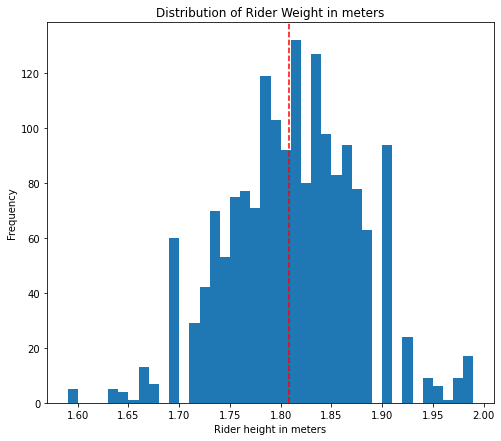

In [103]:
# Distribution of rider height
plt.figure(figsize=(8,7))
plt.hist(TDF_GC['Height(m)'],bins=40)
plt.title('Distribution of Rider Weight in meters')
plt.xlabel('Rider height in meters')
plt.ylabel('Frequency')
plt.axvline(TDF_GC['Height(m)'].mean(), linestyle = '--',c='r')
plt.show()

### Height of TDF winners

In [92]:
TDF_GC[TDF_GC.Rank==1]['Height(m)']

0       1.76
1       1.76
155     1.83
465     1.86
466     1.86
467     1.86
468     1.86
775     1.75
806     1.81
1570    1.74
1636    1.89
Name: Height(m), dtype: float64

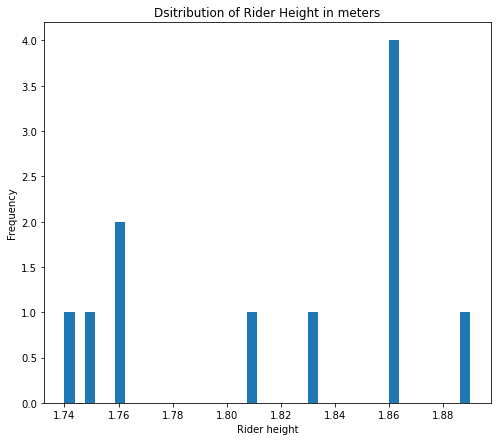

In [90]:
# Distribution of rider weight for winner
plt.figure(figsize=(8,7))
plt.hist(TDF_GC['Height(m)'][TDF_GC['Rank'] == 1],bins=40)
plt.title('Distribution of Rider Height in meters')
plt.xlabel('Rider height')
plt.ylabel('Frequency')
# plt.axvline(TDF_GC['Weight(kg)'].mean(), linestyle = '--',c='r')
plt.show()

In [91]:
print('Mean Height of a TDF winner: ',TDF_GC[TDF_GC.Rank==1]['Height(m)'].mean())
print('Median Height of a TDF winner: ',TDF_GC[TDF_GC.Rank==1]['Height(m)'].median())
print('Most common Height of a TDF winner: ',TDF_GC[TDF_GC.Rank==1]['Height(m)'].mode())

Mean Height of a TDF winner:  1.8163636363636362
Median Height of a TDF winner:  1.83
Most common Height of a TDF winner:  0    1.86
dtype: float64


Seems like a TDF winner is around 1.83~1.86 m tall.

## Age in Years

In [98]:
print('Youngest Rider:', min(TDF_GC['Age']))
print('Oldest Rider:', max(TDF_GC['Age']))

Youngest Rider: 21
Oldest Rider: 43


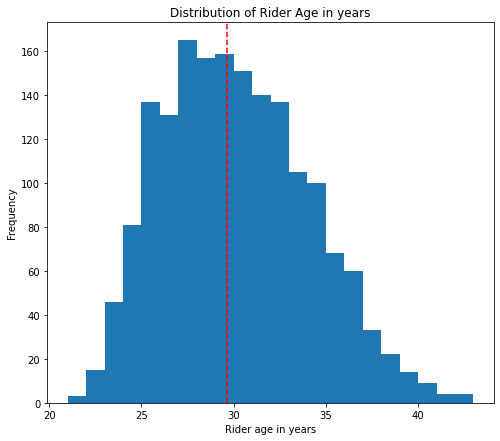

In [99]:
# Distribution of rider height
plt.figure(figsize=(8,7))
plt.hist(TDF_GC['Age'],bins=22)
plt.title('Distribution of Rider Age in years')
plt.xlabel('Rider age in years')
plt.ylabel('Frequency')
plt.axvline(TDF_GC['Age'].mean(), linestyle = '--',c='r')
plt.show()

### Age of TDF winners

In [104]:
TDF_GC[TDF_GC.Rank==1]['Age']

0       23
1       22
155     32
465     32
466     31
467     30
468     28
775     22
806     30
1570    34
1636    32
Name: Age, dtype: int64

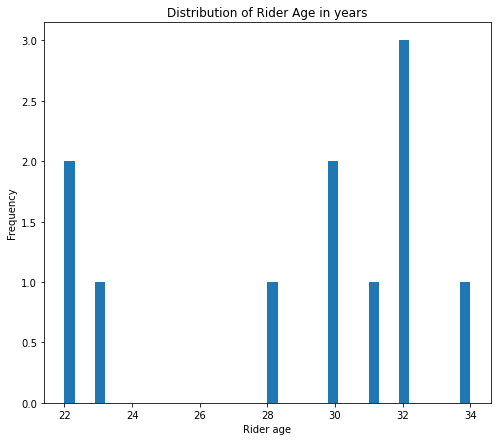

In [105]:
# Distribution of rider weight for winner
plt.figure(figsize=(8,7))
plt.hist(TDF_GC['Age'][TDF_GC['Rank'] == 1],bins=40)
plt.title('Distribution of Rider Age in years')
plt.xlabel('Rider age')
plt.ylabel('Frequency')
# plt.axvline(TDF_GC['Weight(kg)'].mean(), linestyle = '--',c='r')
plt.show()

In [106]:
print('Mean Age of a TDF winner: ',TDF_GC[TDF_GC.Rank==1]['Age'].mean())
print('Median Age of a TDF winner: ',TDF_GC[TDF_GC.Rank==1]['Age'].median())
print('Most common Age of a TDF winner: ',TDF_GC[TDF_GC.Rank==1]['Age'].mode())

Mean Age of a TDF winner:  28.727272727272727
Median Age of a TDF winner:  30.0
Most common Age of a TDF winner:  0    32
dtype: int64


Seems like most TDF winners are around 30~32 years old.

### Are these findings statistically significant?

Null Hypothesis: Rider with weight of 66 kg, height of 1.86 m and 32 years of age doesnt have any better odds of winning than a different rider.

Let's do some stats and model our data to see what we find.